In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.model_selection import train_test_split

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

Basic Data pre-processing :
1(a) Loading the csv files into pandas data frame
1(b) Dividing data into Train and Test data
1(c) Data cleaning
1(a). Loading the csv files into pandas data frame

In [2]:
#  data from csv files is imported to  pandas data frames
data_train_org = pd.read_csv("train_users_2.csv")
print(data_train_org.columns)
data_train_org=data_train_org.sort_values(by='timestamp_first_active')

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [3]:
print(data_train_org.shape)

(213451, 16)


In [5]:
data_train_org.head(4)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other


In [6]:
data_train, data_test = train_test_split(data_train_org, test_size=0.2)
data_train_copy = data_train
print("%d items in training data, %d in test data" % (len(data_train), len(data_test)))

170760 items in training data, 42691 in test data


In [7]:
# Removing the data_first_booking column from data_train , data_test
print(data_train.columns)
data_train.drop('date_first_booking',1)
data_test.drop('date_first_booking',1)
data_train=data_train.sort_values(by='timestamp_first_active')
data_test=data_train.sort_values(by='timestamp_first_active')

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


1(c).Data Cleaning :

Replace the gender , age values which are not present to 'NaN

In [8]:
#replacing gender and age values which are not present to Nan
data_train.gender.replace('-unknown-',np.nan, inplace=True)
data_test.gender.replace('-unknown-',np.nan, inplace=True)
data_train.age.replace('NaN', np.nan, inplace=True)
data_test.age.replace('NaN',np.nan, inplace=True)
print(data_train.head())

           id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

   gender   age signup_method  signup_flow language affiliate_channel  \
0     NaN   NaN      facebook            0       en            direct   
1    MALE  38.0      facebook            0       en               seo   
2  FEMALE  56.0         basic            3       en            direct   
3  FEMALE  42.0      facebook            0       en            direct   
4     NaN  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type 

In [9]:
import missingno as msno
msno.matrix(data_train)

ModuleNotFoundError: No module named 'missingno'

2.Exploratory Data Analysis

2(a) .Univariate analysis
2(b). Bivariate analysis
2(c). Multivariate analysis
2(a) . Univariate analysis

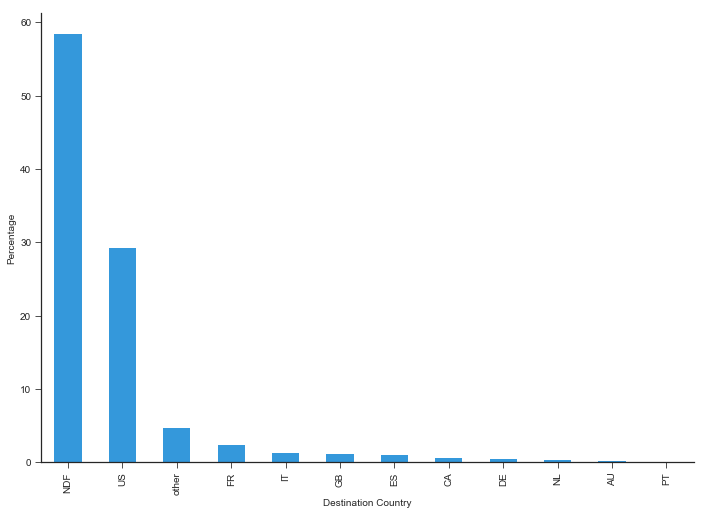

In [10]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = data_train.country_destination.value_counts() / data_train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

Observations :
1 .  57% of users in Train data set did not travel anywhere .
2 .  28 % of users travelled in their home country i.e ..,U.S .

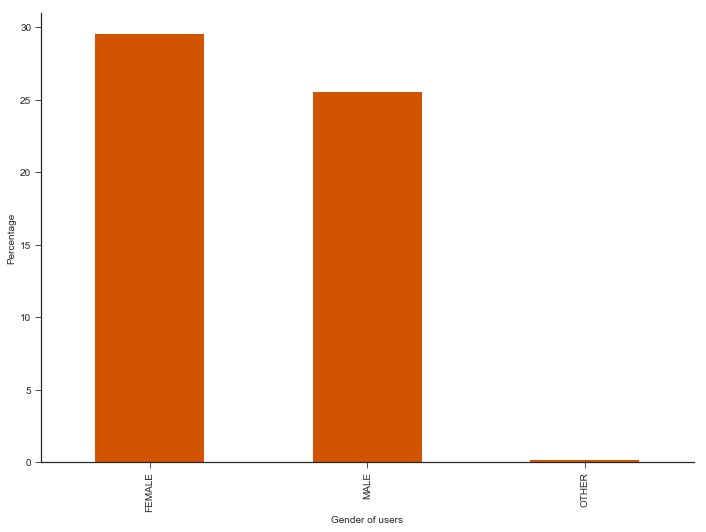

In [11]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
gender_percentage = data_train.gender.value_counts() / data_train.shape[0] * 100
gender_percentage.plot(kind='bar',color='#D35400')
plt.xlabel('Gender of users')
plt.ylabel('Percentage')
sns.despine()

Observations :
1 .  45 % of user's gender information is not present . 
2 .  There is less difference between Female and Male users.

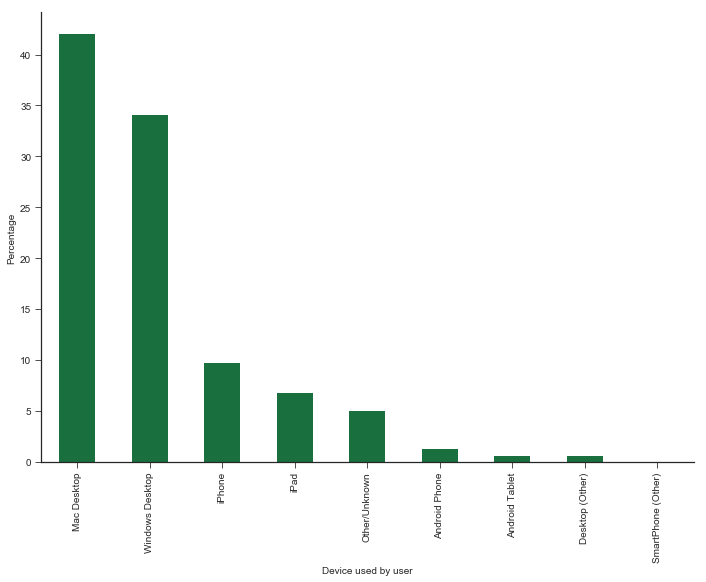

In [12]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device_percentage = data_train.first_device_type.value_counts() / data_train.shape[0] * 100
device_percentage.plot(kind='bar',color='#196F3D')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
sns.despine()

Observations :
1 .  58% users are using Apple products .
2 . Out of 71,719 users who travelled atleast once,31660 users are apple users [ 44.15% ] which implies Mac users are booking more frequently .

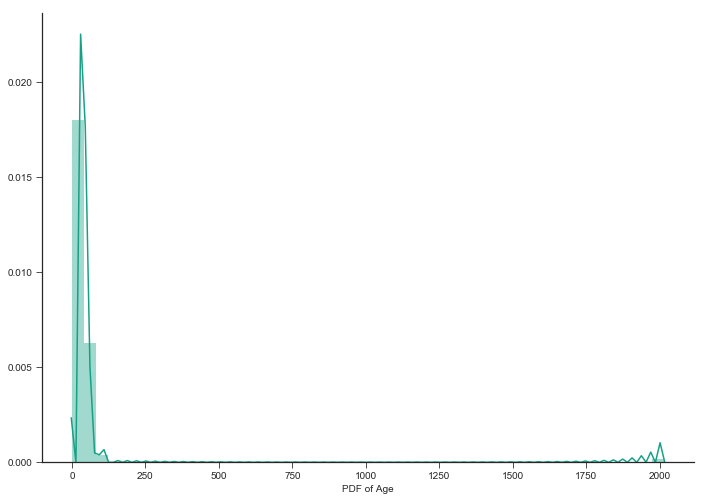

In [13]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(data_train.age.dropna(), color='#16A085')
plt.xlabel('PDF of Age')
sns.despine()

Observations :
1 .  Some age values are incorrect, like close to 2000 , so cleaning such data[ 0.0035% ]

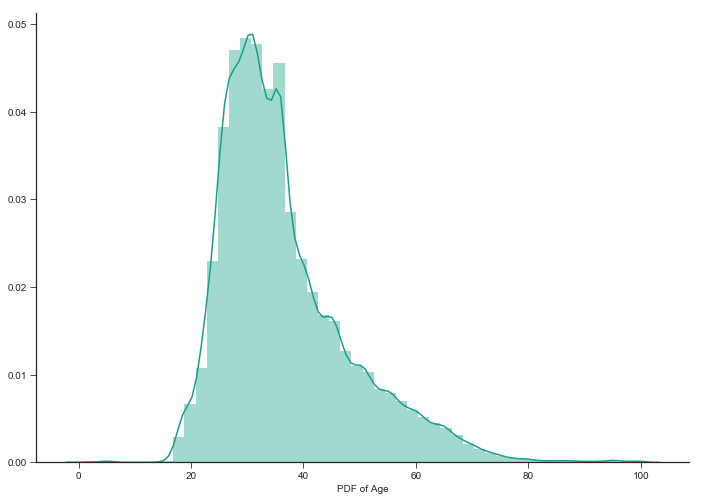

In [14]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_train['age']=data_train['age'].apply(lambda x : 36 if x>100 else x)
sns.distplot(data_train.age.dropna(), color='#16A085')
plt.xlabel('PDF of Age')
sns.despine()

Observations :
1 .  Majority of the users are between age 25 and 40 years . [ 72% ]
2 .  There are some age values which are less than 18 years [ 0.006% ](not allowed)

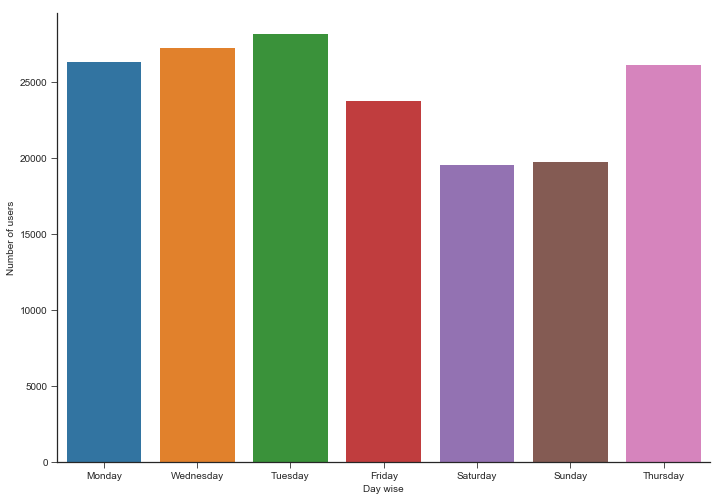

In [15]:
data_train['date_account_created_new'] = pd.to_datetime(data_train['date_account_created'])
data_train['date_first_active_new'] = pd.to_datetime((data_train.timestamp_first_active // 1000000), format='%Y%m%d')
data_train['date_account_created_day'] = data_train.date_account_created_new.dt.weekday_name
data_train['date_account_created_month'] = data_train.date_account_created_new.dt.month
data_train['date_account_created_year'] = data_train.date_account_created_new.dt.year
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='date_account_created_day',data=data_train)
plt.xlabel('Day wise')
plt.ylabel('Number of users')
sns.despine()

Observations :
1 . User activity is low on saturday and sunday . So chance of booking on saturdays , sundays is pretty low .

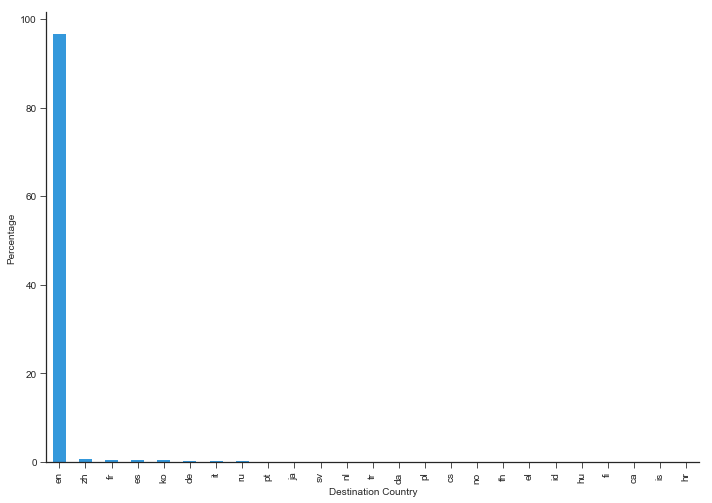

In [16]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = data_train.language.value_counts() / data_train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

Observations :
1  .  Majority of the user's language preference is English (96.67%) . But it is still qu-estionable because most of users are from US 
2 .   Predicting geo location of users based on language preference may be useful .

# 2(b) . Bivariate analysis

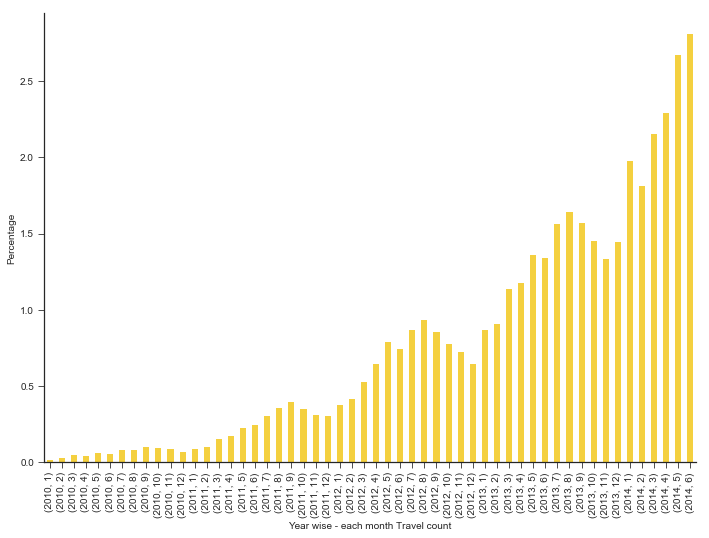

In [17]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
data_train['booked'] = data_train.country_destination.apply(lambda x:1 if x!='NDF' else 0 )
destination_percentage = data_train.groupby(['date_account_created_year','date_account_created_month']).booked.sum() / data_train.shape[0] * 100
destination_percentage.plot(kind='bar',color="#F4D03F")
plt.xlabel('Year wise - each month Travel count')
plt.ylabel('Percentage')
sns.despine()

# Observations :
1  .  Every year it is following almost same trend like in 7,8,9 months the chance of    booking is high .

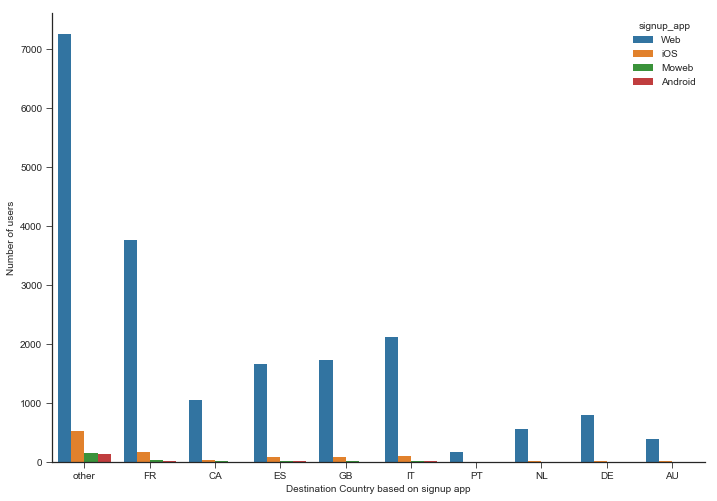

In [18]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_app',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup app')
plt.ylabel('Number of users')
sns.despine()

Observations :
1 .  Users with signup app 'Web' outnumbered other signup app like Moweb , iOS , Android in every country . [ 85% ]
2 . Android is the least used signup app [ 0.02% ]

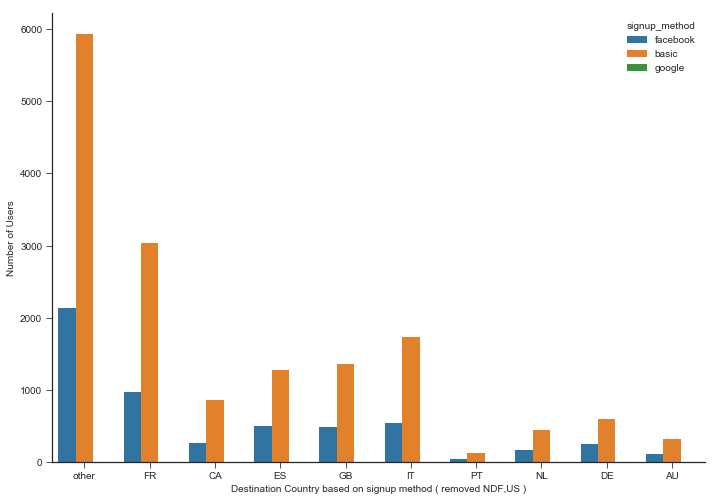

In [19]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_method',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup method ( removed NDF,US )')
plt.ylabel('Number of Users')
sns.despine()

Observations :
1 .  There are less signups (almost negligible) happening by google signup compared to facebook,basic signup(0.03%)
2 .  Basic signup count is almost 2.5 times facebook signup count .

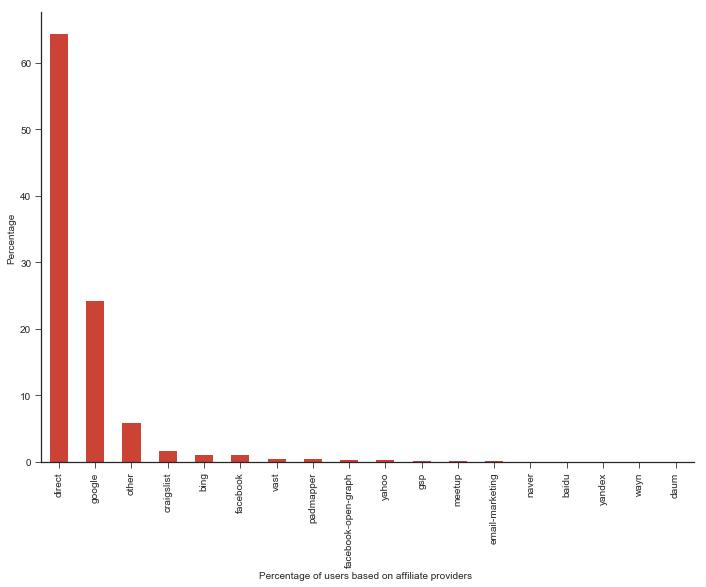

In [20]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
affiliate_provider_percentage = data_train.affiliate_provider.value_counts() / data_train.shape[0] * 100
affiliate_provider_percentage.plot(kind='bar',color='#CB4335')
plt.xlabel('Percentage of users based on affiliate providers ')
plt.ylabel('Percentage')
sns.despine()

Observations :
1 . In previous plot we have observed that percentage of users signing up with google are 0.03% , but in this plot we  observe that most of users are coming  from google (22%)

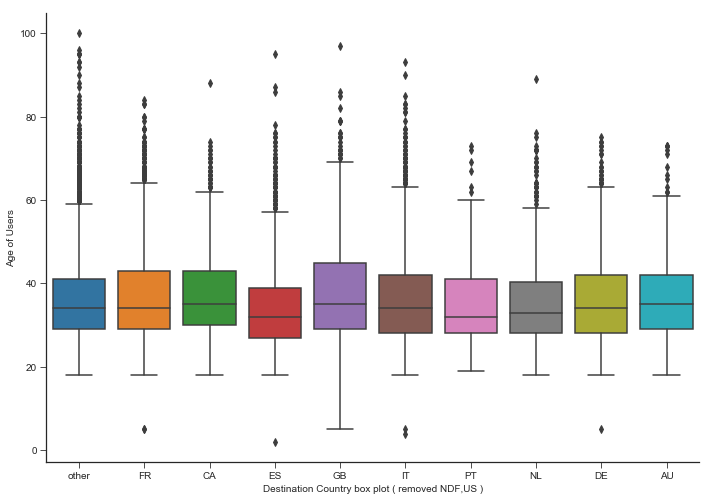

In [21]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.boxplot(y='age' , x='country_destination',data=data_without_NDF1)
plt.xlabel('Destination Country box plot ( removed NDF,US )')
plt.ylabel('Age of Users')
sns.despine()

Observations :
1 .   Users booking for countries Spain , Portugal and Netherlands tend to be younger     where as Users booking for Great Britain tend to be older .

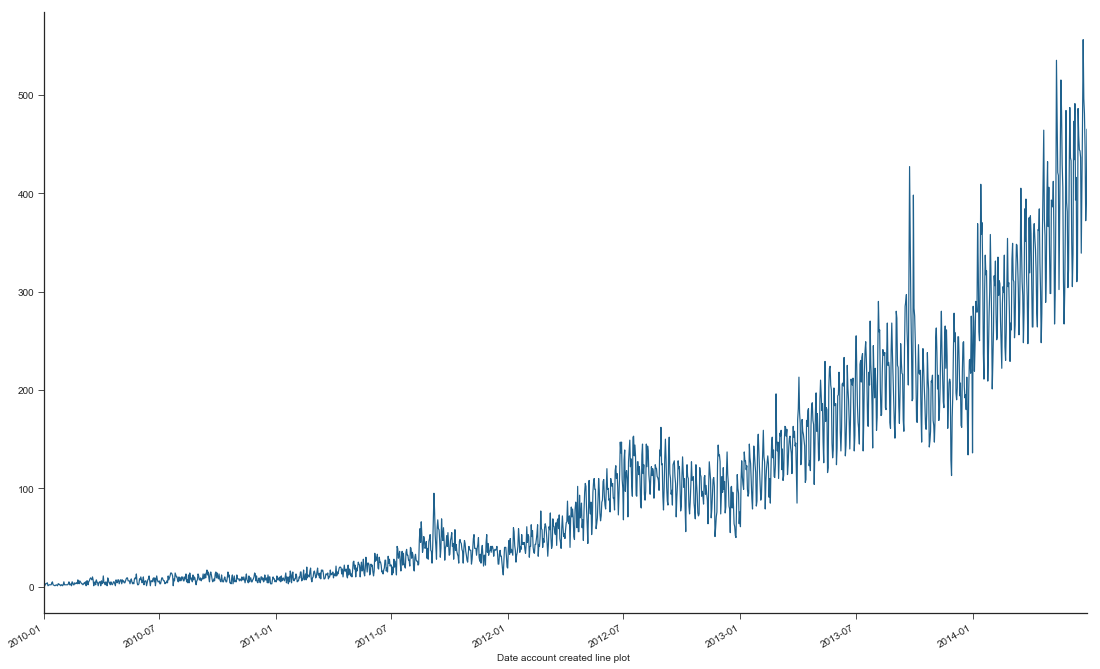

In [22]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 12.27)
data_train.date_account_created_new.value_counts().plot(kind='line', linewidth=1.2, color='#1F618D')
plt.xlabel('Date account created line plot ')
sns.despine()

Observations :
1 . Every year  beween September and October there is increase in Activity of users on Airbnb .
2 . Basic study on this lead to interesting phenomena that users are trying to book for  Superbowl , Labor day.

# 2(c).Multi variate analysis :

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_all = data_train_copy
print(df_all.columns)
df_all = df_all.drop(['id', 'date_first_booking'], axis=1)
df_all = df_all.fillna(-1)
dac = np.vstack(df_all.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df_all['dac_year'] = dac[:,0]
df_all['dac_month'] = dac[:,1]
df_all['dac_day'] = dac[:,2]
df_all = df_all.drop(['date_account_created'], axis=1)
tfa = np.vstack(df_all.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
df_all['tfa_year'] = tfa[:,0]
df_all['tfa_month'] = tfa[:,1]
df_all['tfa_day'] = tfa[:,2]
df_all = df_all.drop(['timestamp_first_active'], axis=1)
av = df_all.age.values
df_all['age'] = np.where(np.logical_or(av<14, av>100), -1, av)
ohe_feats = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

In [ ]:
df_all  = data_train_copy
piv_train = data_train.shape[0]
df_all = df_all.drop(['id', 'date_first_booking'], axis=1)
df_all = df_all.fillna(-1)
dac = np.vstack(df_all.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df_all['dac_year'] = dac[:,0]
df_all['dac_month'] = dac[:,1]
df_all['dac_day'] = dac[:,2]
df_all = df_all.drop(['date_account_created'], axis=1)

tfa = np.vstack(df_all.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
df_all['tfa_year'] = tfa[:,0]
df_all['tfa_month'] = tfa[:,1]
df_all['tfa_day'] = tfa[:,2]
df_all = df_all.drop(['timestamp_first_active'], axis=1)
av = df_all.age.values
df_all['age'] = np.where(np.logical_or(av<14, av>100), -1, av)

# Apply One Hot encoding

In [ ]:
for f in ohe_feats:
    df_all_dummy = pd.get_dummies(df_all[f], prefix=f)
    df_all = df_all.drop([f], axis=1)
    df_all = pd.concat((df_all, df_all_dummy), axis=1)
vals = df_all.values
piv_train = df_all.shape[0]
X = vals[:piv_train]
le = LabelEncoder()
labels = df_all['country_destination'].values
df_all = df_all.drop(['country_destination'], axis=1)
y = le.fit_transform(labels)   
X_test = vals[piv_train:]
df_all

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# PCA Implementation

In [ ]:
%pylab inline
#scatter(X_pca[:, 0], X_pca[:, 1], c)
pylab.rcParams['figure.figsize'] = (15, 11)
X_pca = PCA().fit_transform(df_all)
scatter(X_pca[:, 0], X_pca[:, 1], c=y,cmap=plt.cm.spectral,alpha=.4,
        edgecolor='k')
plt.show()

# T-sne Implementation

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 11)
X_tsne = TSNE(n_iter=251,learning_rate=100,verbose=2).fit_transform(df_all)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,cmap=plt.cm.spectral,alpha=.4,
        edgecolor='k')
plt.show()